In [1]:
#Importamos las librerías necesarias para el modelo
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn import preprocessing

In [ ]:
#Importamos el archivo a analizar
hd = pd.read_csv('heart.csv')
#Lo visualizamos
hd.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Age: age of the patient [years]
#Sex: sex of the patient [M: Male, F: Female]
#ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
#RestingBP: resting blood pressure [mm Hg]
#Cholesterol: serum cholesterol [mm/dl]
#FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
#RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
#MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
#ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
#Oldpeak: oldpeak = ST [Numeric value measured in depression]
#ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
#HeartDisease: output class [1: heart disease, 0: Normal]

In [3]:
#Conocemos cual es la cantidad de gente sana y no
hd.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='count', ylabel='HeartDisease'>

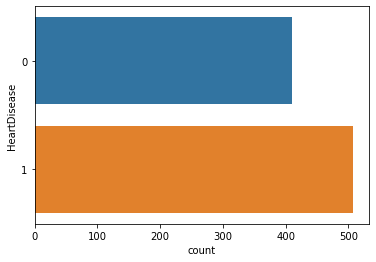

In [4]:
sns.countplot(y=hd.HeartDisease)

In [5]:
#Reemplazamos todas las variables de valor no numérico para estudiar el modelo
hd = hd.replace({'Sex':{'M':0,'F':1}})
hd = hd.replace({'ChestPainType':{'ASY':0,'NAP':1,'ATA':2,'TA':3}})
hd = hd.replace({'RestingECG':{'Normal':0,'LVH':1,'ST':2}})
hd = hd.replace({'ExerciseAngina':{'N':0,'Y':1}})
hd = hd.replace({'ST_Slope':{'Flat':0,'Up':1,'Down':2}})
hd

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,1,160,180,0,0,156,0,1.0,0,1
2,37,0,2,130,283,0,2,98,0,0.0,1,0
3,48,1,0,138,214,0,0,108,1,1.5,0,1
4,54,0,1,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,0,1
914,68,0,0,144,193,1,0,141,0,3.4,0,1
915,57,0,0,130,131,0,0,115,1,1.2,0,1
916,57,1,2,130,236,0,1,174,0,0.0,0,1


In [26]:
#reescalamiento de datos
scaler = preprocessing.MinMaxScaler()

In [7]:
#Separamos las variables
y = hd['HeartDisease']
x = hd.drop(['HeartDisease'], axis=1)

In [8]:
#reescalamos la variable x en valores entre 0 y 1
x = scaler.fit_transform(x)

In [9]:
#establecemos los grupos de entrenamiento y validación
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3,random_state=0)

In [10]:
#Ciclo for para determinar cual K es el óptimo
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    error.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error promedio')

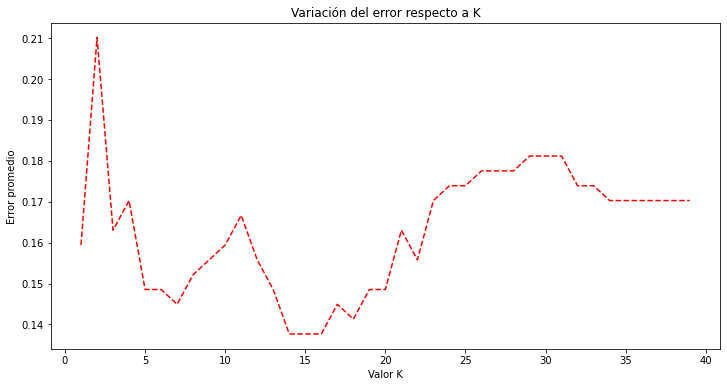

In [11]:
#Graficamos para observar de forma clara cual es el K óptimo
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed',
         markerfacecolor='blue')
plt.title('Variación del error respecto a K')
plt.xlabel('Valor K')
plt.ylabel('Error promedio')

In [12]:
#Aplicamos KN-Neighbors
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=15)

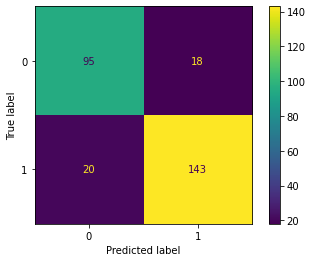

In [13]:
#Obtenemos la predicción y creamos la matriz de confusión 
ypred = classifier.predict(xtest)
plot_confusion_matrix(classifier, xtest, ytest, normalize=None)
plt.show()

In [14]:
#Mostramos nuestros resultados porcentuales
print('El error es de',np.mean(ypred != ytest))
print('La prediccion es de:',classifier.score(xtrain,ytrain))
print('La prediccion es de:',classifier.score(xtest,ytest))

El error es de 0.13768115942028986
La prediccion es de: 0.8489096573208723
La prediccion es de: 0.8623188405797102


In [ ]:
#Observamos cuales variables tienen mayor correlación
mutual_info=mutual_info_classif(xtrain,ytrain)
mutual_info

array([0.03258772, 0.02523572, 0.14352458, 0.03455147, 0.02598373,
       0.00722231, 0.        , 0.11076906, 0.14898806, 0.13306896,
       0.24603   ])

In [16]:
#descartamos las que no sean las 4 más altas
hd.drop(['Age','Sex','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR'],axis=1,inplace=True)
hd

,ChestPainType,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,0,0.0,1,0
1,1,0,1.0,0,1
2,2,0,0.0,1,0
3,0,1,1.5,0,1
4,1,0,0.0,1,0
...,...,...,...,...,...
913,3,0,1.2,0,1
914,0,0,3.4,0,1
915,0,1,1.2,0,1
916,2,0,0.0,0,1


In [17]:
#Separamos nuevamente las variables
y = hd['HeartDisease']
x = hd.drop(['HeartDisease'], axis=1)

In [18]:
#Reescalamos x otra vez
x = scaler.fit_transform(x)

In [19]:
#Dividimos en entrenamiento y validación
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3,random_state=0)

In [20]:
#Ciclo for para halalr K
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    error.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error promedio')

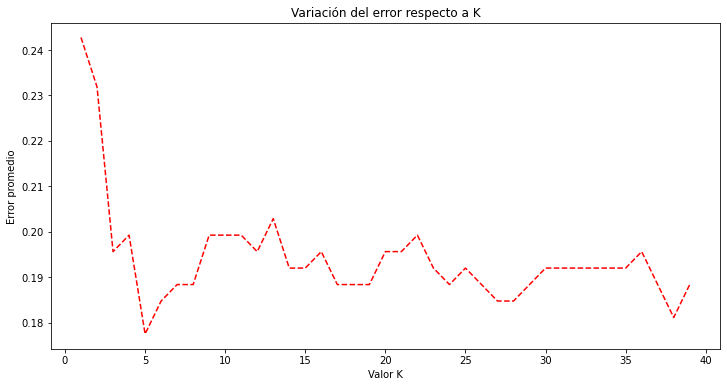

In [21]:
#Graficamos K con el error promedio
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed',
         markerfacecolor='blue')
plt.title('Variación del error respecto a K')
plt.xlabel('Valor K')
plt.ylabel('Error promedio')

In [22]:
#Aplicamos KN-Neighbors
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(xtrain, ytrain)

KNeighborsClassifier()

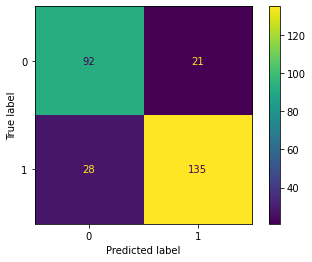

In [23]:
#Obtenemos la predicción y la matriz de confusión
ypred = classifier.predict(xtest)
plot_confusion_matrix(classifier, xtest, ytest, normalize=None)
plt.show()

In [27]:
#Mostramos nuestros resultados porcentuales
print('El error es de',np.mean(ypred != ytest))
print('La prediccion es de:',classifier.score(xtrain,ytrain))
print('La prediccion es de:',classifier.score(xtest,ytest))

El error es de 0.17753623188405798
La prediccion es de: 0.8753894080996885
La prediccion es de: 0.822463768115942
